In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms

from torch.utils.data import DataLoader
from torch.utils.data import random_split
import copy
import numpy as np
import matplotlib.pyplot as plt
import time
import os

from torchvision.models import vgg16

from PIL import Image

In [ ]:
transformes= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)

])

In [ ]:
train_data=datasets.MNIST(
                          root='data',
                          train=True,
                          transform=transformes,
                          download=True
                          )
test_data=datasets.MNIST(
                        root='data',
                        train=False,
                        download=True,
                        transform=transformes)

train_loader=DataLoader(train_data,batch_size=100,shuffle=True)
test_loader=DataLoader(test_data,batch_size=100,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 42646216.57it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2060586.42it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14282097.32it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6422969.92it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



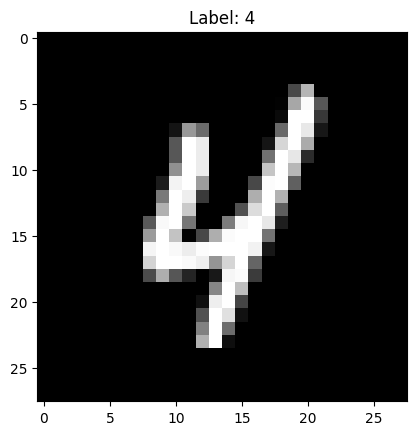

In [ ]:
image, label = train_data[166]
plt.imshow(image.permute(1, 2, 0).squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.show()

In [ ]:
class ImprovedCNN(nn.Module):
  def __init__(self):
    super(ImprovedCNN, self).__init__()
    self.conv1=nn.Conv2d(1,32,kernel_size=3,padding=1)
    self.bn1=nn.BatchNorm2d(32)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.bn2=nn.BatchNorm2d(64)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.bn3=nn.BatchNorm2d(128)
    self.pool=nn.MaxPool2d(2,2)
    self.dropout=nn.Dropout(p=0.5)
    self.fc1=nn.Linear(128*3*3,256)
    self.fc2=nn.Linear(256,10)
  def forward(self,x):
    x=self.pool(torch.relu(self.bn1(self.conv1(x))))
    x=self.pool(torch.relu(self.bn2(self.conv2(x))))
    x=self.pool(torch.relu(self.bn3(self.conv3(x))))
    x=x.view(-1,128*3*3)
    x=F.relu(self.fc1(x))
    x=self.dropout(x)
    x=self.fc2(x)
    return x
model=ImprovedCNN()

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ImprovedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
Loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
for epoch in range(7):
  running_loss=0
  for i,data in enumerate(train_loader,0):

    inputs,labels=data
    optimizer.zero_grad()
    # output=model(inputs)   # cpu
    output=model(inputs.to(device))   # cuda
    # loss=Loss_fn(output,labels)  # cpu
    loss=Loss_fn(output,labels.to(device))   # cuda
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if i % 100 == 99:
      print(f'Train Epoch: {epoch +1} , Batch :{i+1} , Loss: {running_loss/100 :.3f}')
      running_loss=0.0

print('Finished Training')


Train Epoch: 1 , Batch :100 , Loss: 0.478
Train Epoch: 1 , Batch :200 , Loss: 0.125
Train Epoch: 1 , Batch :300 , Loss: 0.101
Train Epoch: 1 , Batch :400 , Loss: 0.088
Train Epoch: 1 , Batch :500 , Loss: 0.082
Train Epoch: 1 , Batch :600 , Loss: 0.067
Train Epoch: 2 , Batch :100 , Loss: 0.062
Train Epoch: 2 , Batch :200 , Loss: 0.057
Train Epoch: 2 , Batch :300 , Loss: 0.052
Train Epoch: 2 , Batch :400 , Loss: 0.056
Train Epoch: 2 , Batch :500 , Loss: 0.058
Train Epoch: 2 , Batch :600 , Loss: 0.049
Train Epoch: 3 , Batch :100 , Loss: 0.040
Train Epoch: 3 , Batch :200 , Loss: 0.044
Train Epoch: 3 , Batch :300 , Loss: 0.044
Train Epoch: 3 , Batch :400 , Loss: 0.038
Train Epoch: 3 , Batch :500 , Loss: 0.045
Train Epoch: 3 , Batch :600 , Loss: 0.037
Train Epoch: 4 , Batch :100 , Loss: 0.034
Train Epoch: 4 , Batch :200 , Loss: 0.029
Train Epoch: 4 , Batch :300 , Loss: 0.033
Train Epoch: 4 , Batch :400 , Loss: 0.036
Train Epoch: 4 , Batch :500 , Loss: 0.035
Train Epoch: 4 , Batch :600 , Loss

In [ ]:
correct=0
total=0
with torch.no_grad():
  for data in test_loader:
    images,labels=data
    # outputs=model(images)   # cpu
    images = images.to(device)  # cuda
    labels = labels.to(device) # cuda
    outputs=model(images)   # cuda
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100*correct/total :.2f}%')

Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 98.33%
Accuracy of the network on the 10000 test images: 98.50%
Accuracy of the network on the 10000 test images: 98.60%
Accuracy of the network on the 10000 test images: 98.83%
Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 99.12%
Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 99.00%
Accuracy of the network on the 10000 test images: 99.08%
Accuracy of the network on the 10000 test images: 98.92%
Accuracy of the network on the 10000 test images: 98.79%
Accuracy of the network on the 10000 test images: 98.87%
Accuracy of the network on the 10000 test images: 98.94%
Accuracy of the network on the 10000 test images: 98.82%
Accuracy of the network on the 

In [ ]:
from google.colab import files
up = files.upload()


Saving img181.png to img181.png
Saving img185.png to img185.png
Saving img187.png to img187.png
Saving img191.png to img191.png


In [ ]:
import io
filename = next(iter(up))
image_bytes = up[filename]
image = Image.open(io.BytesIO(image_bytes))

In [ ]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((28, 28)),
    transforms.Normalize((0.5,), (0.5,)),
])
img = transformer(image)
# img = img.unsqueeze(0).to(device)

In [ ]:
# plt.imshow(img.permute(1, 2, 0))


In [ ]:
# img=Image.open('img196.png').convert('L')
# # img.resize((28,28))

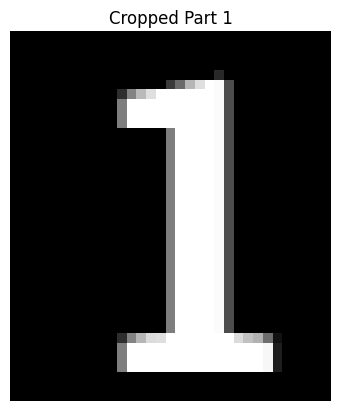

Prediction for part 1 of image img181.png: 1
The three-digit number in image img181.png is: 1


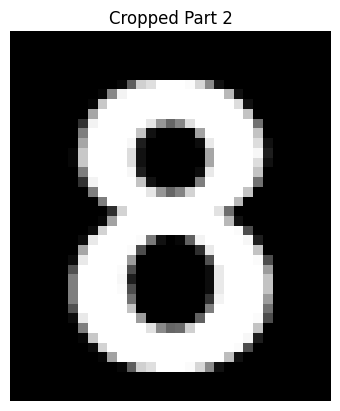

Prediction for part 2 of image img181.png: 8
The three-digit number in image img181.png is: 18


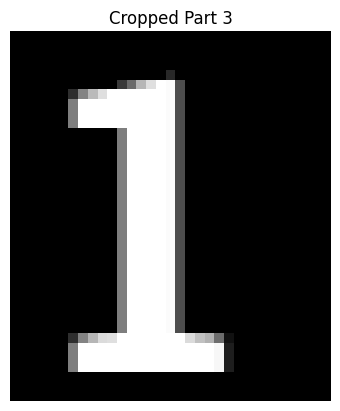

Prediction for part 3 of image img181.png: 1
The three-digit number in image img181.png is: 181


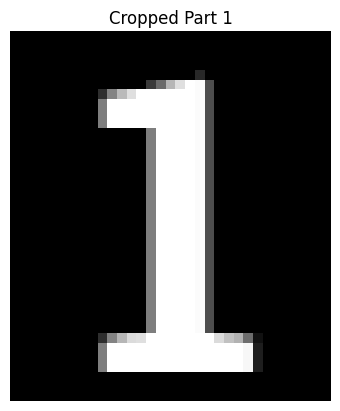

Prediction for part 1 of image img185.png: 1
The three-digit number in image img185.png is: 1


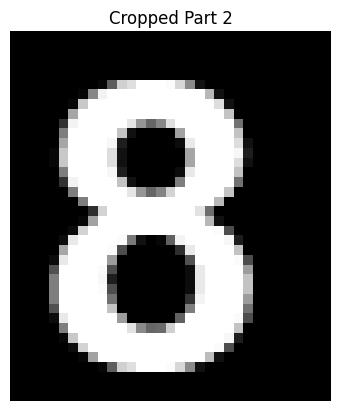

Prediction for part 2 of image img185.png: 8
The three-digit number in image img185.png is: 18


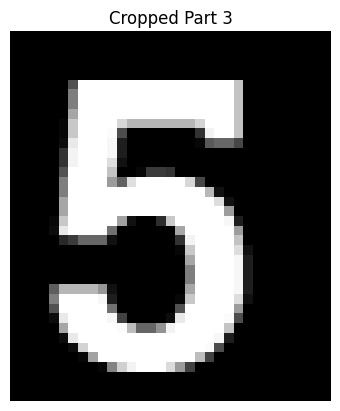

Prediction for part 3 of image img185.png: 5
The three-digit number in image img185.png is: 185


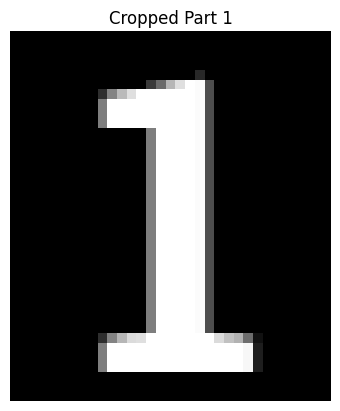

Prediction for part 1 of image img187.png: 1
The three-digit number in image img187.png is: 1


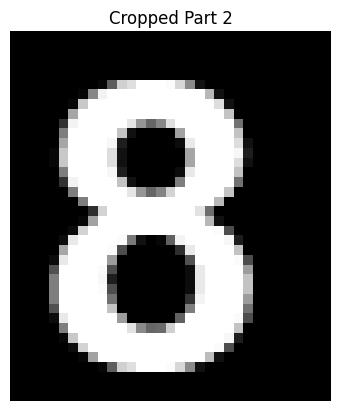

Prediction for part 2 of image img187.png: 8
The three-digit number in image img187.png is: 18


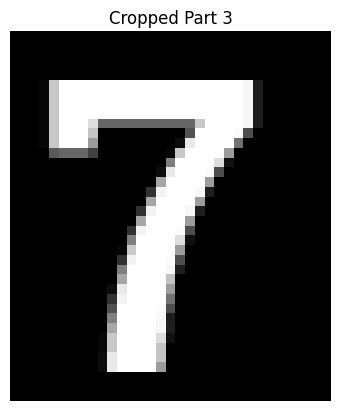

Prediction for part 3 of image img187.png: 7
The three-digit number in image img187.png is: 187


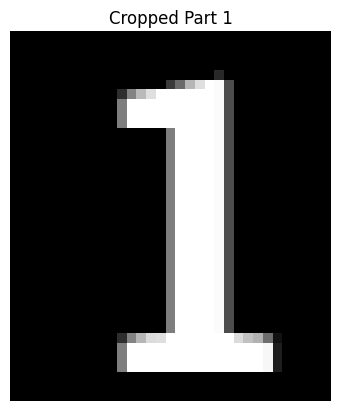

Prediction for part 1 of image img191.png: 1
The three-digit number in image img191.png is: 1


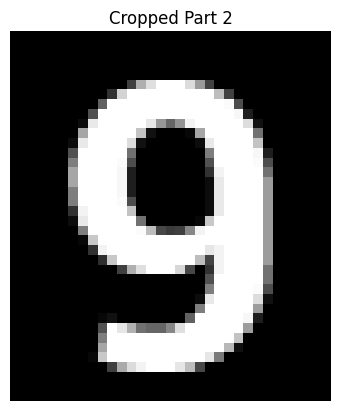

Prediction for part 2 of image img191.png: 9
The three-digit number in image img191.png is: 19


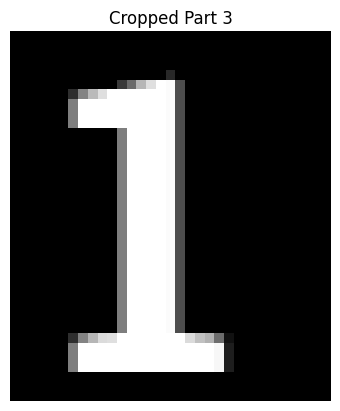

Prediction for part 3 of image img191.png: 1
The three-digit number in image img191.png is: 191


In [ ]:
model.eval()
model.to(device)
all_results = []
for j in up.keys():
    img = Image.open(j)
    # img = img.resize((28, 28))   # if this is line comment
    width, height = img.size
    part_width = width // 3
    result = ""
    for k in range(3):
        left = k * part_width
        right = (k + 1) * part_width
        img_part = img.crop((left, 0, right,height)).convert('L')
        for i in _:
            img_part = img_part.convert('L')
            img_tensor = transformer(img_part)
            img_tensor = img_tensor.unsqueeze(0).to(device)

            plt.imshow(img_part, cmap='gray')
            plt.title(f'Cropped Part {k+1}')
            plt.axis('off')
            plt.show()

            with torch.no_grad():
                output = model(img_tensor)
                _, predicted = torch.max(output.data, 1)

            result += str(predicted.item())
            print(f"Prediction for part {k+1} of image {j}: {predicted.item()}")


        print(f"The three-digit number in image {j} is:", result)
        all_results.append(result)

In [ ]:
!pip install jdatetime

In [ ]:
import datetime
import pandas as pd
from time import strftime
import jdatetime
import pytz

# for i in range(1,1000):             # For data in refesh
#   time.sleep(0.1)
tz_Tehran = pytz.timezone('Asia/Tehran')
time = datetime.datetime.now(tz_Tehran).strftime("%H:%M:%S")
date = jdatetime.datetime.now().strftime("%Y-%m-%d")

# print(all_results)

Biodata = {
    'Device': ['1', '2','3','4'],
    'Prediction':[all_results[2],all_results[5],all_results[8],all_results[11]], # Added a blank element to match the length of 'Device'
    'Date': [date, date, date, date],
    'Time': [time,time, time, time],
}


df = pd.DataFrame(Biodata)
df.to_csv('Detect.csv', index=False)


files.download('Detect.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df)

  Device Prediction        Date      Time
0      1        181  1403-07-07  16:30:52
1      2        185  1403-07-07  16:30:52
2      3        187  1403-07-07  16:30:52
3      4        191  1403-07-07  16:30:52


# Why do you connect to img in transformer
# why do you write -> img = img.resize((28, 28))
